In [123]:
import pandas as pd
import geopandas as gpd
import xml.etree.ElementTree as ET
from datetime import datetime


In [124]:
gpx_file = r'..\..\..\..\data\strava\Rupit_Loop.gpx'
gdf = gpd.read_file(gpx_file)
gdf


,ele,time,magvar,geoidheight,name,cmt,desc,src,link1_href,link1_text,...,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid,geometry


In [125]:
ns = {'gpxns': 'http://www.topografix.com/GPX/1/1'}

In [126]:
tree = ET.parse(gpx_file)
root = tree.getroot()
for child in root:
    print(child)


<Element '{http://www.topografix.com/GPX/1/1}metadata' at 0x000001C0252358B0>
<Element '{http://www.topografix.com/GPX/1/1}trk' at 0x000001C025235EF0>


In [127]:
trk = root.find('gpxns:trk', ns)
for child in trk:
    print(child)


<Element '{http://www.topografix.com/GPX/1/1}name' at 0x000001C025235D10>
<Element '{http://www.topografix.com/GPX/1/1}type' at 0x000001C025235CC0>
<Element '{http://www.topografix.com/GPX/1/1}trkseg' at 0x000001C025235B80>


In [128]:
trk = root.find('gpxns:trk', ns)
trkseg = trk.find('gpxns:trkseg', ns)
trkpts = []
FMT = '%Y-%m-%dT%H:%M:%SZ'
cols = ['DateTime', 'Longitude', 'Latitude', 'Elevation']
for trkpt in trkseg:
    x = float(trkpt.attrib['lon'])
    y = float(trkpt.attrib['lat'])
    elev = float(trkpt.find('gpxns:ele', ns).text) + 76
    trkpt_dt_text = trkpt.find('gpxns:time', ns).text
    trkpt_dt = datetime.strptime(trkpt_dt_text, FMT)
    trkpts.append((trkpt_dt, x, y, elev))
df = pd.DataFrame.from_records(trkpts, columns=cols)
df


,DateTime,Longitude,Latitude,Elevation
0,2018-04-30 06:15:50,2.823739,41.981655,76.6
1,2018-04-30 06:15:51,2.823758,41.981671,76.2
2,2018-04-30 06:15:52,2.823758,41.981671,75.4
3,2018-04-30 06:15:54,2.823823,41.981718,76.6
4,2018-04-30 06:15:58,2.823926,41.981820,76.4
...,...,...,...,...
10742,2018-04-30 16:24:01,2.823945,41.981973,93.0
10743,2018-04-30 16:24:04,2.823986,41.981853,92.8
10744,2018-04-30 16:24:05,2.823989,41.981831,92.8
10745,2018-04-30 16:24:11,2.823973,41.981696,93.0


In [129]:
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude, crs="EPSG:4326"))

<Axes: >

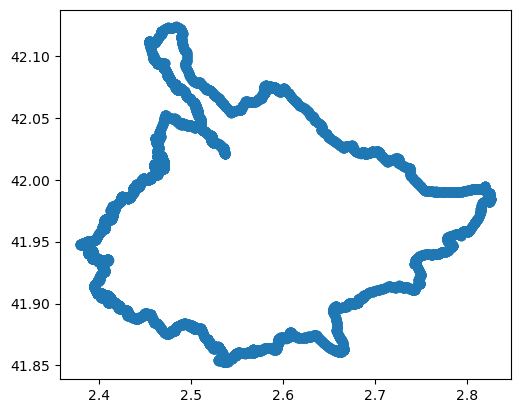

In [130]:
gdf.plot()

<Axes: >

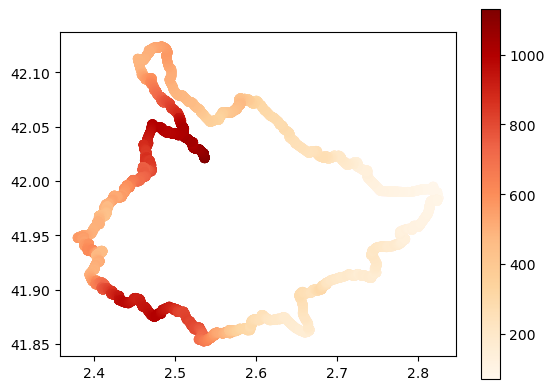

In [131]:
gdf.plot("Elevation", legend=True, cmap='OrRd')

<Axes: >

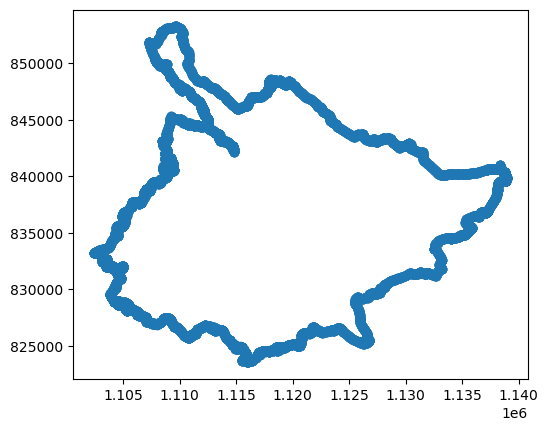

In [132]:
gdf_2062 = gdf.to_crs('EPSG:2062')
gdf_2062.plot()

In [133]:
gdf_2062['geometry'].explore()

In [134]:
gdf.to_file(r'..\..\..\..\data\strava\gdf_4326.gpkg', driver='GPKG')

In [135]:
gdf_2062_without_datatime = gdf_2062.drop(columns = ['DateTime'])
gdf_2062_without_datatime.to_file(r'..\..\..\..\data\strava\gdf_projected_2062.shp', driver='ESRI Shapefile')

In [136]:
gdf_2062

,DateTime,Longitude,Latitude,Elevation,geometry
0,2018-04-30 06:15:50,2.823739,41.981655,76.6,POINT (1138831.042 839539.888)
1,2018-04-30 06:15:51,2.823758,41.981671,76.2,POINT (1138832.482 839541.774)
2,2018-04-30 06:15:52,2.823758,41.981671,75.4,POINT (1138832.482 839541.774)
3,2018-04-30 06:15:54,2.823823,41.981718,76.6,POINT (1138837.471 839547.370)
4,2018-04-30 06:15:58,2.823926,41.981820,76.4,POINT (1138845.153 839559.285)
...,...,...,...,...,...
10742,2018-04-30 16:24:01,2.823945,41.981973,93.0,POINT (1138845.483 839576.339)
10743,2018-04-30 16:24:04,2.823986,41.981853,92.8,POINT (1138849.842 839563.302)
10744,2018-04-30 16:24:05,2.823989,41.981831,92.8,POINT (1138850.268 839560.884)
10745,2018-04-30 16:24:11,2.823973,41.981696,93.0,POINT (1138850.040 839545.841)


In [137]:
gdf_2062['Longitude_projected'] = gdf_2062.geometry.x
gdf_2062['Latitude_projected'] = gdf_2062.geometry.y
gdf_2062

,DateTime,Longitude,Latitude,Elevation,geometry,Longitude_projected,Latitude_projected
0,2018-04-30 06:15:50,2.823739,41.981655,76.6,POINT (1138831.042 839539.888),1.138831e+06,839539.887700
1,2018-04-30 06:15:51,2.823758,41.981671,76.2,POINT (1138832.482 839541.774),1.138832e+06,839541.773935
2,2018-04-30 06:15:52,2.823758,41.981671,75.4,POINT (1138832.482 839541.774),1.138832e+06,839541.773935
3,2018-04-30 06:15:54,2.823823,41.981718,76.6,POINT (1138837.471 839547.370),1.138837e+06,839547.370290
4,2018-04-30 06:15:58,2.823926,41.981820,76.4,POINT (1138845.153 839559.285),1.138845e+06,839559.285480
...,...,...,...,...,...,...,...
10742,2018-04-30 16:24:01,2.823945,41.981973,93.0,POINT (1138845.483 839576.339),1.138845e+06,839576.339152
10743,2018-04-30 16:24:04,2.823986,41.981853,92.8,POINT (1138849.842 839563.302),1.138850e+06,839563.301661
10744,2018-04-30 16:24:05,2.823989,41.981831,92.8,POINT (1138850.268 839560.884),1.138850e+06,839560.884151
10745,2018-04-30 16:24:11,2.823973,41.981696,93.0,POINT (1138850.040 839545.841),1.138850e+06,839545.841417


In [138]:
gdf_2062_diff = gdf_2062[['DateTime', 'Latitude_projected', 'Longitude_projected']].diff()
gdf_2062_diff

,DateTime,Latitude_projected,Longitude_projected
0,NaT,NaN,NaN
1,0 days 00:00:01,1.886235,1.439934
2,0 days 00:00:01,0.000000,0.000000
3,0 days 00:00:02,5.596355,4.988766
4,0 days 00:00:04,11.915190,7.682274
...,...,...,...
10742,0 days 00:00:01,-3.430149,-1.243890
10743,0 days 00:00:03,-13.037490,4.359141
10744,0 days 00:00:01,-2.417510,0.426064
10745,0 days 00:00:06,-15.042733,-0.227989


In [139]:
gdf_2062_diff['Length_segment[m]'] = (gdf_2062_diff['Latitude_projected']**2 + gdf_2062_diff['Longitude_projected']**2)**0.5
gdf_2062_diff

,DateTime,Latitude_projected,Longitude_projected,Length_segment[m]
0,NaT,NaN,NaN,NaN
1,0 days 00:00:01,1.886235,1.439934,2.373034
2,0 days 00:00:01,0.000000,0.000000,0.000000
3,0 days 00:00:02,5.596355,4.988766,7.497131
4,0 days 00:00:04,11.915190,7.682274,14.177062
...,...,...,...,...
10742,0 days 00:00:01,-3.430149,-1.243890,3.648724
10743,0 days 00:00:03,-13.037490,4.359141,13.746937
10744,0 days 00:00:01,-2.417510,0.426064,2.454768
10745,0 days 00:00:06,-15.042733,-0.227989,15.044461


In [140]:
total_distance_km = gdf_2062_diff['Length_segment[m]'].sum() / 1000
total_distance_km

174.5969011477015

In [141]:
sum_time = gdf_2062_diff['DateTime'].sum()
total_time_hours = sum_time.total_seconds() / 3600
total_time_hours

10.140277777777778

In [142]:
average_speed = total_distance_km / total_time_hours
average_speed

17.218157625851948

In [143]:
mean_time = gdf_2062_diff['DateTime'].mean()
average_time_seconds = mean_time.total_seconds()
average_time_seconds

3.397077